# แก้ Overfiting ของ Polynomial Regression

เนื่องจากผมยังไม่มีตัวอย่าง overfiting ในเรื่องนี้

แต่การแก้ overfiting เป็นสิ่งสำคัญโดยมี ประมาณ 3 อย่างที่จะยกตัวอย่าง

โดยการเพิ่ม Regularization

- 1. Ridge Regression (L2 Regularization)

-  2. Lasso Regression (L1 Regularization)

- 3. ElasticNet (L1 + L2)

## Regulariztion คืออะไร

Regularization คือเทคนิคใน Machine Learning ที่ใช้เพื่อ ลดปัญหา Overfitting โดยการ เพิ่มบทลงโทษ (Penalty) ในฟังก์ชัน Loss เพื่อไม่ให้โมเดลเรียนรู้ค่าพารามิเตอร์ (เช่น ค่าสัมประสิทธิ์) ที่ "ใหญ่เกินไป" หรือ "ซับซ้อนเกินจำเป็น"

## ทำไมต้องใช้ Regularization?

เมื่อโมเดลซับซ้อนเกินไป เช่น polynomial degree สูง มันจะสามารถ "จำข้อมูลฝึก" ได้ดีมาก (training error ต่ำ) แต่จะ ทำนายข้อมูลใหม่ไม่แม่น (test error สูง) นี่คือปัญหา Overfitting

Regularization แก้ปัญหานี้โดย:

บีบค่าสัมประสิทธิ์ให้เล็กลง (ไม่ให้ curve หรือเส้นพอดีเกินไป)

ทำให้โมเดลเรียบขึ้น

ช่วยเลือกฟีเจอร์ที่สำคัญ (ในบางกรณี)

# data

import lib

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
x = np.linspace(-20, 30, 200)
x

array([-20.        , -19.74874372, -19.49748744, -19.24623116,
       -18.99497487, -18.74371859, -18.49246231, -18.24120603,
       -17.98994975, -17.73869347, -17.48743719, -17.2361809 ,
       -16.98492462, -16.73366834, -16.48241206, -16.23115578,
       -15.9798995 , -15.72864322, -15.47738693, -15.22613065,
       -14.97487437, -14.72361809, -14.47236181, -14.22110553,
       -13.96984925, -13.71859296, -13.46733668, -13.2160804 ,
       -12.96482412, -12.71356784, -12.46231156, -12.21105528,
       -11.95979899, -11.70854271, -11.45728643, -11.20603015,
       -10.95477387, -10.70351759, -10.45226131, -10.20100503,
        -9.94974874,  -9.69849246,  -9.44723618,  -9.1959799 ,
        -8.94472362,  -8.69346734,  -8.44221106,  -8.19095477,
        -7.93969849,  -7.68844221,  -7.43718593,  -7.18592965,
        -6.93467337,  -6.68341709,  -6.4321608 ,  -6.18090452,
        -5.92964824,  -5.67839196,  -5.42713568,  -5.1758794 ,
        -4.92462312,  -4.67336683,  -4.42211055,  -4.17

In [36]:
y=3*x**4+np.random.normal(-1, 200)*x**3+2*x**2+np.random.normal(-100, 100000,size=x.shape)

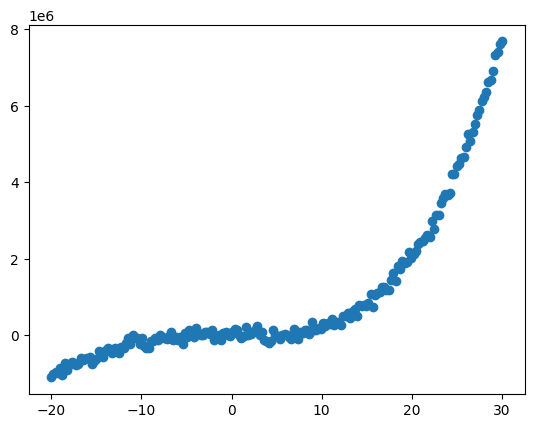

In [37]:
plt.scatter(x, y)

## f(x)

มาทำสมการ ก่อน

In [38]:
def polynomial_features(x, degree):
    return np.vstack([x**i for i in range(degree + 1)]).T  

ทำไมต่างจากครั้งที่เราที่เราเขียน f(x) ตอนนี้เรามาเรียนในรูปแบบ matrix เต็มตัว


np.vstack คือการเอามารวมกัน เช่น 

In [39]:
a= np.array([1,2,3]);b=np.array([4,5,6]) 
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

เอามาต่อกัน

โดยเราจะแปลงให้ x อยู่ในรูปแบบสมการ $x^{i}+...+x^{n}$

ก็รูปแบบ ของ Polynomial นั้นละ $\beta_{0}+\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}+...+\beta_{n}x^{n}$

แต่ยังไม่คูณเข้า $\beta$ ด้วย

แล้วทำไมต้อง .T หรือ Transpose คือการกลับ row เป้น columns หรือ columns เป็น row

ตย โค้ด

ให้ x_fake = [1,2,3]

In [40]:
x_fake=np.array([1,2,3])
x_fake

array([1, 2, 3])

เข้าสมการโดยการ loop degree กำหนด 2 เพิ่มความง่าย โดยเลข 2 นี้หมายถึง xยกกำลังสูงสุดคือเลข 2 

ในสมการ $x^{2}+x^{1}+x^{0}$

เนื่องจาก loop python range(2) มันจะ 0,1 เราเลย +1 ให้ range(2+1) หรือ range(3) ทำให้ 0,1,2 ในการ loop นั้นเอง

In [41]:
x_fake_s = np.vstack([x_fake**i for i in range(2 + 1)])
x_fake_s

array([[1, 1, 1],
       [1, 2, 3],
       [1, 4, 9]])

โดยผลลัพธ์ [1, 1, 1] มาจาก $x_{0}^{0},x_{1}^{0},x_{3}^{0}$ หรือ $1^{0},2^{0},3^{0}$ จากที่เรากำหนด x_fake=[1,2,3]

ซึ่งอะไรยกกำลังด้วย 0 จะมีค่าเท่ากับ 1

แล้ว x_fake_s[1]=[1, 2, 3]

มาจาก $1^{1},2^{1},3^{1}$

แล้ว x_fake_s[2]=[1, 4, 9]

มาจาก $1^{2},2^{2},3^{2}$ = [1, 4, 9]

In [42]:
x_fake_s.T

array([[1, 1, 1],
       [1, 2, 4],
       [1, 3, 9]])

แน่นอนการทำ .T ทำให้ matric ตรงกับสมการมาที่สุดคือ $x^{i}+...+x^{n}$

คุณจะเห็นว่า ใน columns ก่อน Transpose นั้น จะเป็นค่าเลข 1 ซึ่งอ้างมาจาก x_fake 

การทำ Transpose มีจุดหนึ่งคือการ คูณ matrix นั้นเองทำให้มันตรงกันเรื่อยๆ ตามสมการที่ผมกำหนด

# Ridge Regression (L2 Regularization)

โดย algo ตัวจะ loss function (RSS) Residual Sum of Squares

แล้วนำมาปรับเพิ่มเติมโดยการเพิ่ม + l2 ถึงเป็น # Ridge Regression (L2 Regularization)

โดย RSS คือ $\sum_{i}^{n}{(y_{i}-\hat{y_{i}})}$

โดยต่างจาก mse แค่ mse นำการหารค่าเฉลียโดย เราสามารถใช้ mse ได้นะครับ

In [14]:
def RSS(y, y_hat):
    return np.sum((y - y_hat)**2)
    

โดยจะเพิ่ม +l2เข้าไปคือ + $\alpha \sum_{j}^{p}(\beta_{j}^{2})$


Ridge Regression (L2 Regularization) = RSS+ $\alpha \sum_{j}^{p}(\beta_{j}^{2})$ หรือ $\sum_{i=0}^{n}{(y_{i}-\hat{y_{i}})}$ + $\alpha \sum_{j=1}^{p}(\beta_{j}^{2})$

พอทำ Grad จะได้รูป $-2*X*(y-\beta_{0}+\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}+...+\beta_{n}x^{n}) + 2 * \alpha * \beta_{i}$

เนื่องจาก $\hat{y_{i}}$ = $\beta_{0}+\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}+...+\beta_{n}x^{n}$

จะได้ $-2*X*(y-\hat{y_{i}}) + 2 * \alpha * \beta_{i}$

ซึ่งผมจะไม่ได้ diff ให้ดู แต่ diff by $\beta_{i}$ นะครับ

In [2]:
X = polynomial_features(x, 5)
X

NameError: name 'polynomial_features' is not defined

## กำหนดก่อน train

In [ ]:
beta = np.zeros(X.shape[1])  # (degree+1,)
learning_rate = 1e-16             # learning rate
alpha = 0.1                    # alpha a regularization
epochs = 50000

โดยผมจะกำหนด ให้ beta เป้นตัวที่ [0,0,0,0,0] ตาม degree ที่กำหนด

learning_rate = 1e-13 น่าจะok

lam = 0.1  ตัวลงโทษให้มีความ overfit น้อยลง

## train 

คุณจะเห็น y_pred = X @ beta คือการ นำ X ที่เป็น $x^{i}+...+x^{n}$ มาคูณกับ $beta$ จะได้รูป $\beta_{0}+\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}+...+\beta_{n}x^{n}$

ทำให้ y_pred = $\beta_{0}+\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}+...+\beta_{n}x^{n}$ เป็นสมการ polynomial

แล้ว X คือ matrix อยู่แล้ววิธีการคูณ คือ โดย X.shape = [n,5] beta.shape = [5,] ถ้ามองในรูปแบบ matrix 

ผมจะเอาตัวอย่างของ x_fake_s.T แล้ว เพิ่มมีถึง 1,2,3,4

$$X = \begin{bmatrix}1^{0} & 1^{1} & 1^{2}\\
2^{0} & 2^{1} &2^{2}\\
3^{0} & 3^{1} & 3^{2}\\
4^{0} & 4^{1} & 4^{2}\\
\end{bmatrix}$$

beta = ให้เป็น 1 ทั้งหมด

$$\beta = \begin{bmatrix}1\\1\\1\\
\end{bmatrix}$$

การคูณ X @ beta =

$$\begin{bmatrix}1^{0} & 1^{1} & 1^{2}\\
2^{0} & 2^{1} &2^{2}\\
3^{0} & 3^{1} & 3^{2}\\
4^{0} & 4^{1} & 4^{2}
\end{bmatrix}
*
\begin{bmatrix}1\\1\\1\\
\end{bmatrix}
=
\begin{bmatrix}1^{0}*1_{1}+1^{1}*1_{2}+1^{2}*1_{3}\\2^{0}*1+2^{1}*1+2^{2}*1\\3^{0}*1+3^{1}*1+3^{2}*1\\4^{0}*1+4^{1}*1+4^{2}*1\\
\end{bmatrix}
หรือ
\begin{bmatrix}1+1+1=1\\1+2+4=7\\1+3+9=13\\1+4+16=21\\
\end{bmatrix}
$$

ทำ y_pred = [1,7,13,21] shape = (n,)

In [242]:
y.shape

(200,)

ซึ่งตรงกับ y_pred กับ y shape =(n,)เท่ากัน ทำไมต้องบอกว่า n ทั้งที่แสดง 200 เพราะ ความเป็นจริง ดาต้าไม่ได้ 200 เลยกำหนด n

grad = -2 * (X.T @ error) + 2 * alpha * beta 

ตรงgrad ทำไมต้อง X.T อีกครั้ง 

In [243]:
X.shape

(200, 5)

เพราะ X เฉยๆ จะเป็น (200, 5) แต่ error เป็น (200,) เราต้องกลับ X ให้เป็น (5,200) จะได้คูณ matrix ได้

In [244]:
X.T.shape

(5, 200)

ลองไปฝึก matrix กันนะครับ

วิธีมองง่ายๆ a(แถว,หลัก) b(แถว,หลัก) aหลัก=bแถว จะคูณกันได้

แสดงว่าถ้าเรากลับด้านแล้ว X (5,200) error (200,) xหลัก=200 และ errorแถว=200 ทำให้คูณกันได้

ตรง grad[0] -= 2 * alpha * beta[0] ลบออกเพราะ สมการเลยนะครับ

β₀ (bias term) ไม่ถูกลงโทษ หมายความว่า noise แล้วจะไม่มีบทลงโทษ

In [266]:
# Gradient Descent
for i in range(epochs):
    y_pred = X @ beta
    error = y - y_pred
    grad = -2 * (X.T @ error) + 2 * alpha * beta
    grad[0] -= 2 * alpha * beta[0]  # ไม่ลงโทษ bias term
    beta -= learning_rate * grad
    print(i,"RSS =", RSS(y, y_pred))

0 RSS = 67226924730852.484
1 RSS = 16740917907277.06
2 RSS = 10219773978036.445
3 RSS = 9375847204519.402
4 RSS = 9265024403953.424
5 RSS = 9248868433026.254
6 RSS = 9244937411547.127
7 RSS = 9242585555868.686
8 RSS = 9240438167586.193
9 RSS = 9238317730672.746
10 RSS = 9236201322183.984
11 RSS = 9234085981899.412
12 RSS = 9231971327400.488
13 RSS = 9229857309142.277
14 RSS = 9227743920564.102
15 RSS = 9225631160655.938
16 RSS = 9223519029124.566
17 RSS = 9221407525769.379
18 RSS = 9219296650401.768
19 RSS = 9217186402834.732
20 RSS = 9215076782881.525
21 RSS = 9212967790355.473
22 RSS = 9210859425069.973
23 RSS = 9208751686838.467
24 RSS = 9206644575474.46
25 RSS = 9204538090791.512
26 RSS = 9202432232603.23
27 RSS = 9200327000723.29
28 RSS = 9198222394965.41
29 RSS = 9196118415143.375
30 RSS = 9194015061071.018
31 RSS = 9191912332562.225
32 RSS = 9189810229430.951
33 RSS = 9187708751491.188
34 RSS = 9185607898556.996
35 RSS = 9183507670442.488
36 RSS = 9181408066961.834
37 RSS = 9179

C:\Users\ptii2\AppData\Local\Temp\ipykernel_32496\2259953797.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


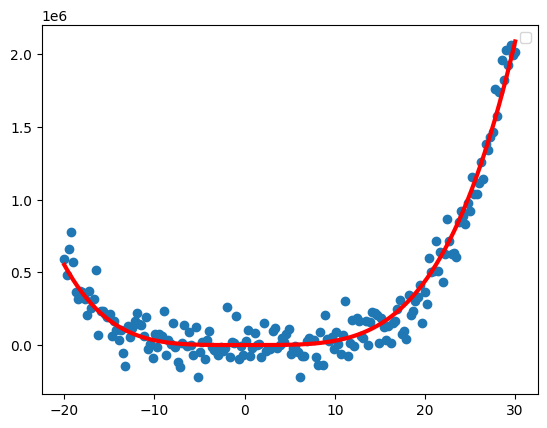

beta = [ 1.58884510e-05 -5.04998618e-04  5.28546104e-03 -1.24289608e-01
  3.09597932e+00 -1.71851552e-02]


In [268]:
# ทำนายและแสดงผล
y_fit = X @ beta
plt.scatter(x, y)
plt.plot(x, y_fit, color="red", linewidth=3)
plt.legend()
plt.show()

# แสดงค่าพารามิเตอร์
print("beta =", beta)

คุณคิดว่ามันดีขึ้นไหม

แน่นอนว่าตรง algo อื่นผมจะไม่ คูณ matrix ให้ดูนะครับ

# Lasso Regression (L1 Regularization)

ต่างกับ L2 แค่ $\beta$ ไม่ยกกำลัง 2 แต่ $|\beta|$


โดยสมการเต็มๆคือ $\sum_{i=0}^{n}{(y_{i}-\hat{y_{i}})}$ + $\alpha \sum_{j=1}^{p}|\beta_{j}|$

ทำให้ grad คือ $-2 * X * (y - \hat{y})+ alpha * sign(\beta)$

In [49]:
X = polynomial_features(x, 3)
epochs = 50000
learning_rate = 1e-12  # learning rate
alpha = 0.1
beta = np.zeros(X.shape[1])  # (degree+1,)


In [50]:
# Gradient Descent with L2 Regularization
for i in range(epochs):
    y_pred = X @ beta
    error = y - y_pred
    grad = -2 * (X.T @ error) + alpha * np.sign(beta)
    beta -= learning_rate * grad
    print(i, "RSS =", RSS(y, y_pred))

0 RSS = 1016259451665100.0
1 RSS = 962699760745905.6
2 RSS = 912009380789013.2
3 RSS = 864034595612119.2
4 RSS = 818629923994235.5
5 RSS = 775657678508162.1
6 RSS = 734987547987412.1
7 RSS = 696496202361430.2
8 RSS = 660066918660778.8
9 RSS = 625589227058164.4
10 RSS = 592958575871934.2
11 RSS = 562076014516175.25
12 RSS = 532847893435970.1
13 RSS = 505185580117876.2
14 RSS = 479005190314433.1
15 RSS = 454227333667648.75
16 RSS = 430776872960072.06
17 RSS = 408582696263390.3
18 RSS = 387577501293596.8
19 RSS = 367697591318793.06
20 RSS = 348882682000721.5
21 RSS = 331075718584282.44
22 RSS = 314222702880666.1
23 RSS = 298272529519432.44
24 RSS = 283176830972977.75
25 RSS = 268889830883428.66
26 RSS = 255368205247183.22
27 RSS = 242570951036142.97
28 RSS = 230459261857235.88
29 RSS = 218996410273170.0
30 RSS = 208147636427559.62
31 RSS = 197880042636682.66
32 RSS = 188162493628221.6
33 RSS = 178965522124465.97
34 RSS = 170261239483658.2
35 RSS = 162023251128507.97
36 RSS = 1542265765054

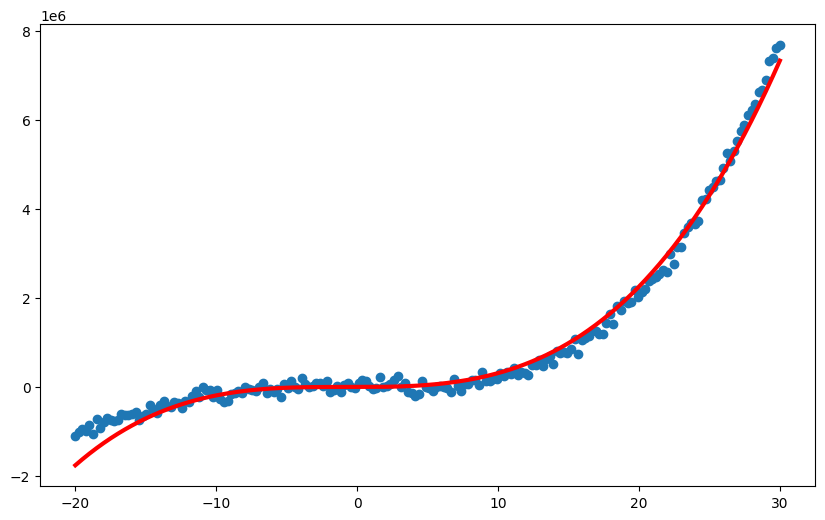

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
y_fit = X @ beta
plt.plot(x, y_fit, color="red", linewidth=3)

# L1+L2

ElasticNet l1+l2 

grad_mse = -2/n * (X.T @ error)

grad_l1 = l1_ratio * alpha * np.sign(w)

grad_l2 = 2 * (1 - l1_ratio) * alpha * w

grad_total = grad_mse + grad_l1 + grad_l2


w -= lr * grad_total

เราจะนำ l1_ratio มาว่าจะเอาอันไหนมากกว่าคิดไม่ออก แนะนำ 0.5

และนี้คือตัวอย่าง gradใช้ MSE ไม่ใช่ RSS